In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
os.chdir(r'/content')

In [4]:
#!kaggle datasets download -d puneet6060/intel-image-classification

In [5]:
#os.chdir(r'/content/{/content}/datasets/puneet6060/intel-image-classification')

In [6]:
#!unzip *.zip

In [7]:
from fastai.vision import *
from fastai.metrics import accuracy

In [8]:
path = Path(r'/content/{/content}/datasets/puneet6060/intel-image-classification')

In [9]:
%matplotlib inline

In [10]:
data = ImageDataBunch.from_folder(path, ds_tfms = get_transforms(do_flip = False), size = 228).normalize(imagenet_stats)

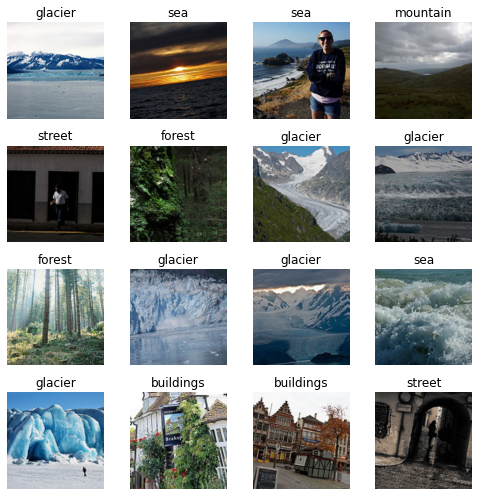

In [11]:
data.show_batch(rows = 4, figsize = (7, 7))

In [12]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy) 

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.481226,0.336009,0.881667,02:39
1,0.343133,0.256868,0.908000,02:38
2,0.271803,0.209423,0.922333,02:39
3,0.226167,0.200917,0.925667,02:39


In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


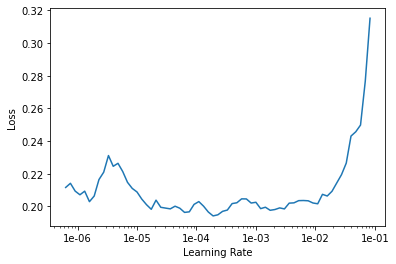

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(2, max_lr = slice(1e-05, 1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.207056,0.197711,0.930333,02:38
1,0.214890,0.199791,0.929333,02:38


In [17]:
img = open_image(r'/content/download.jpg')

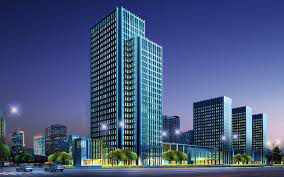

In [18]:
img

In [19]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class.obj

'buildings'

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
idxs, losses = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

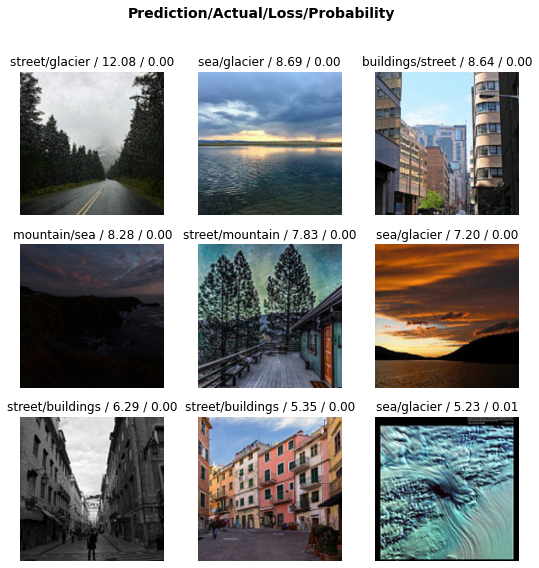

In [23]:
interp.plot_top_losses(9, figsize = (9, 9))

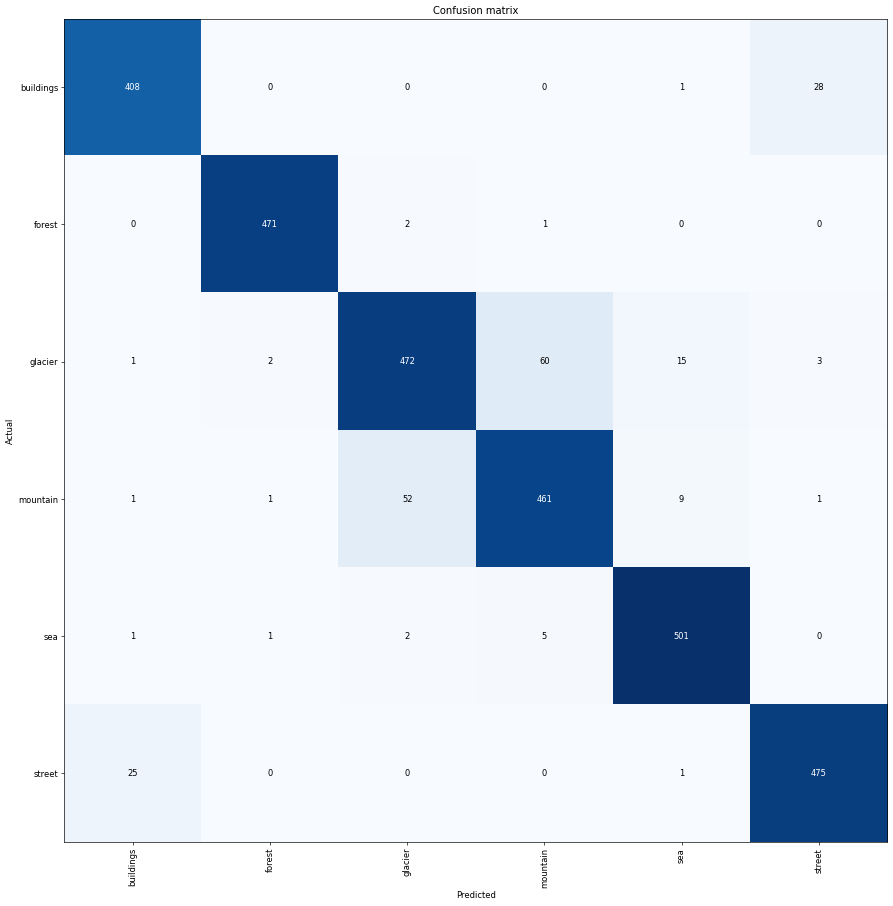

In [24]:
interp.plot_confusion_matrix(figsize = (15, 15), dpi = 60)

In [25]:
interp.most_confused(min_val = 1)

[('glacier', 'mountain', 60),
 ('mountain', 'glacier', 52),
 ('buildings', 'street', 28),
 ('street', 'buildings', 25),
 ('glacier', 'sea', 15),
 ('mountain', 'sea', 9),
 ('sea', 'mountain', 5),
 ('glacier', 'street', 3),
 ('forest', 'glacier', 2),
 ('glacier', 'forest', 2),
 ('sea', 'glacier', 2),
 ('buildings', 'sea', 1),
 ('forest', 'mountain', 1),
 ('glacier', 'buildings', 1),
 ('mountain', 'buildings', 1),
 ('mountain', 'forest', 1),
 ('mountain', 'street', 1),
 ('sea', 'buildings', 1),
 ('sea', 'forest', 1),
 ('street', 'sea', 1)]